In [ ]:
!pip install sdv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sdv.datasets.demo import download_demo
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata

# Get the 'adult' demo dataset
data, metadata = download_demo('single_table', dataset_name='adult')

# Let's peek at what this looks like:
print(data.head())

# Build a model to learn the structure of our data
model = CTGANSynthesizer(metadata)
model.fit(data)

# Generate 1000 new, synthetic records
new_data = model.sample(1000)

   age workclass  fnlwgt     education  education-num      marital-status  \
0   27   Private  177119  Some-college             10            Divorced   
1   27   Private  216481     Bachelors             13       Never-married   
2   25   Private  256263    Assoc-acdm             12  Married-civ-spouse   
3   46   Private  147640       5th-6th              3  Married-civ-spouse   
4   45   Private  172822          11th              7            Divorced   

         occupation   relationship                race     sex  capital-gain  \
0      Adm-clerical      Unmarried               White  Female             0   
1    Prof-specialty  Not-in-family               White  Female             0   
2             Sales        Husband               White    Male             0   
3  Transport-moving        Husband  Amer-Indian-Eskimo    Male             0   
4  Transport-moving  Not-in-family               White    Male             0   

   capital-loss  hours-per-week native-country  label  


In [ ]:
import pandas as pd

# Grab some statistical measures from the original data
real_age_mean = data['age'].mean()
real_age_dist = data['age'].value_counts().sort_index()

# Compare them to the synthetic data
synth_age_mean = new_data['age'].mean()
synth_age_dist = new_data['age'].value_counts().sort_index()

# Print the results for easy comparison
print("Real age average:", real_age_mean)
print("Synthetic age average:", synth_age_mean)
print("Real age distribution:\n", real_age_dist)
print("Synthetic age distribution:\n", synth_age_dist)

Real age average: 38.58164675532078
Synthetic age average: 36.819
Real age distribution:
 17    395
18    550
19    712
20    753
21    720
     ... 
85      3
86      1
87      1
88      3
90     43
Name: age, Length: 73, dtype: int64
Synthetic age distribution:
 17    15
18    26
19    25
20    27
21    21
      ..
78     1
80     1
81     1
84     1
85     1
Name: age, Length: 63, dtype: int64


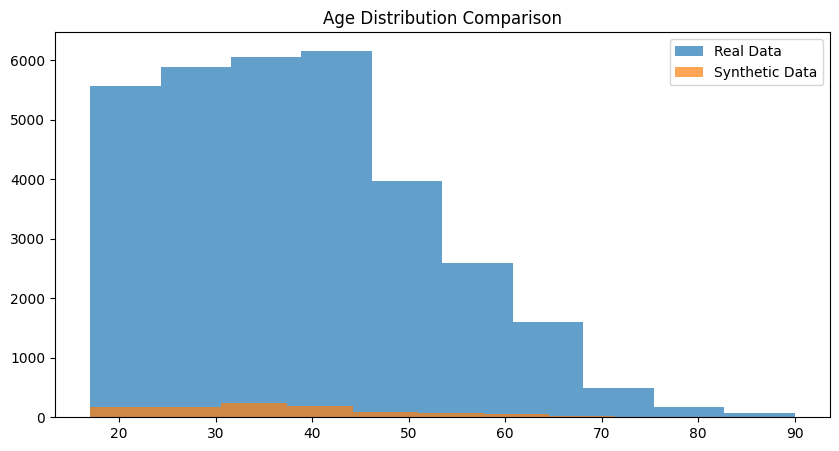

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms of age distributions (real vs. synthetic) side-by-side
plt.figure(figsize=(10, 5))
plt.hist(data['age'], label='Real Data', alpha=0.7)
plt.hist(new_data['age'], label='Synthetic Data', alpha=0.7)
plt.legend()
plt.title('Age Distribution Comparison')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder

# Before the 'train_test_split'...
encoder = OrdinalEncoder()

# Step 1: Prep real data
X_real = data[['age', 'education']]
y_real = data['label']
X_real['education'] = encoder.fit_transform(data[['education']])

X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X_real, y_real, test_size=0.3)

# Step 2: Train a model on REAL data
model_real = LogisticRegression()
model_real.fit(X_train_real, y_train_real)

y_pred_real = model_real.predict(X_test_real)
accuracy_real = accuracy_score(y_test_real, y_pred_real)

# Step 3: Repeat for SYNTHETIC data
X_synth = new_data[['age', 'education']]
y_synth = new_data['label']
X_synth['education'] = encoder.transform(new_data[['education']])

X_train_synth, X_test_synth, y_train_synth, y_test_synth = train_test_split(X_synth, y_synth, test_size=0.3)

model_synth = LogisticRegression()
model_synth.fit(X_train_synth, y_train_synth)

y_pred_synth = model_synth.predict(X_test_synth)
accuracy_synth = accuracy_score(y_test_synth, y_pred_synth)

# Step 4: Compare!
print("Accuracy on real data: ", accuracy_real)
print("Accuracy on synthetic data: ", accuracy_synth)

Accuracy on real data:  0.7423482444467192
Accuracy on synthetic data:  0.8166666666666667
